##Data Extraction

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [ ]:
!kaggle datasets download -d moltean/fruits

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [ ]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


##Import the library

In [ ]:
import numpy as np
import matplotlib.pylab as plt
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
import tensorflow as tf
import tensorflow_hub as hub
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import keras_preprocessing
from keras_preprocessing import image
from google.colab import files

##Data processing

In [ ]:
#Define the directory
root_dir="/content/gdrive/My Drive"
path = "/content/gdrive/MyDrive/Kaggle/fruit"
training="/content/gdrive/MyDrive/Kaggle/fruit/training"
testing="/content/gdrive/MyDrive/Kaggle/fruit/testing"

#training set sirectory
train_set_apple = "/content/gdrive/MyDrive/Kaggle/fruit/training/apple"
train_set_banana = "/content/gdrive/MyDrive/Kaggle/fruit/training/banana"
train_set_mango = "/content/gdrive/MyDrive/Kaggle/fruit/training/Mango"
train_set_grape = "/content/gdrive/MyDrive/Kaggle/fruit/training/grape"
train_set_orange = "/content/gdrive/MyDrive/Kaggle/fruit/training/Orange"
train_set_watermelon = "/content/gdrive/MyDrive/Kaggle/fruit/training/Watermelon"

#testing set sirectory
test_set_apple = "/content/gdrive/MyDrive/Kaggle/fruit/testing/apple"
test_set_banana = "/content/gdrive/MyDrive/Kaggle/fruit/testing/banana"
test_set_grape = "/content/gdrive/MyDrive/Kaggle/fruit/testing/grape"
test_set_orange = "/content/gdrive/MyDrive/Kaggle/fruit/testing/Orange"
test_set_mango = "/content/gdrive/MyDrive/Kaggle/fruit/testing/Mango"
test_set_watermelon = "/content/gdrive/MyDrive/Kaggle/fruit/testing/Watermelon"

In [ ]:
#Test image in 5 classes
print(len(os.listdir(test_set_apple)))
print(len(os.listdir(test_set_banana)))
print(len(os.listdir(test_set_grape)))
print(len(os.listdir(test_set_mango)))
print(len(os.listdir(test_set_orange)))
print(len(os.listdir(test_set_watermelon)))

164
164
328
166
160
157


In [ ]:
#Train image in 5 classes
print(len(os.listdir(train_set_apple)))
print(len(os.listdir(train_set_banana)))
print(len(os.listdir(train_set_grape)))
print(len(os.listdir(train_set_mango)))
print(len(os.listdir(train_set_orange)))
print(len(os.listdir(train_set_watermelon)))

492
490
984
490
479
475


In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255.)

# NOTE: YOU MUST USE A BATCH SIZE OF 10 (batch_size=10) FOR THE 
# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(training,
                                                    batch_size=100,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1.0/255.)

# NOTE: YOU MUST USE A BACTH SIZE OF 10 (batch_size=10) FOR THE 
# VALIDATION GENERATOR.
validation_generator = validation_datagen.flow_from_directory(testing,
                                                              batch_size=100,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 3410 images belonging to 6 classes.
Found 1139 images belonging to 6 classes.


In [ ]:
dataset = (ImageList.from_folder(path)
                                .split_by_rand_pct(0.2)
                                .label_from_folder()
                                .transform(get_transforms(), size=256)
                                .add_test_folder(testing)).databunch(bs=32).normalize(imagenet_stats)

In [ ]:
#Define the datset 
print("Number of Classes "+ str(len(dataset.classes)))
print("List the number of classes " + str(dataset.classes)) 

Number of Classes 6
List the number of classes ['Mango', 'Orange', 'Watermelon', 'apple', 'banana', 'grape']


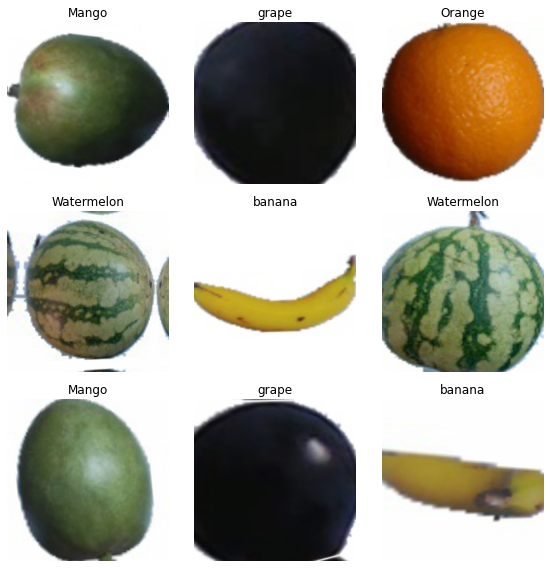

In [ ]:
#Show the dataset
dataset.show_batch(rows=3, figsize=(8,8))

## Define & training the model

In [ ]:
TRAINING_DIR = training
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = testing
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=126
)

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

history = model.fit(train_generator, epochs= 50, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)

model.save("rps.h5")

Found 3410 images belonging to 6 classes.
Found 1139 images belonging to 6 classes.
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
____________________________________

##Conclusion

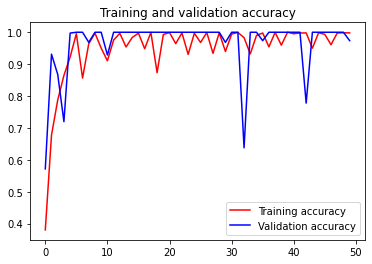

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:


uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)

Saving download (28).jpg to download (28) (1).jpg
download (28).jpg
[[0. 0. 0. 1. 0.]]
